## Initialize 

In [1]:
import pandas as pd

## Load Data

In [3]:
dfMlb = pd.read_csv('house_prices.csv')

In [6]:
dfMlb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
dfMlb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Select data for the model

In [8]:
# select a prediction 'target'
y = dfMlb.loc[:,'Price'] 

In [9]:
#select 'features'
X = dfMlb.loc[:,['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

In [10]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


In [11]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


## Build model

### 1. Define

In [17]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

mdlDtrMlb = DecisionTreeRegressor()

### 2. Fit

In [18]:
mdlDtrMlb.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### 3. Predict

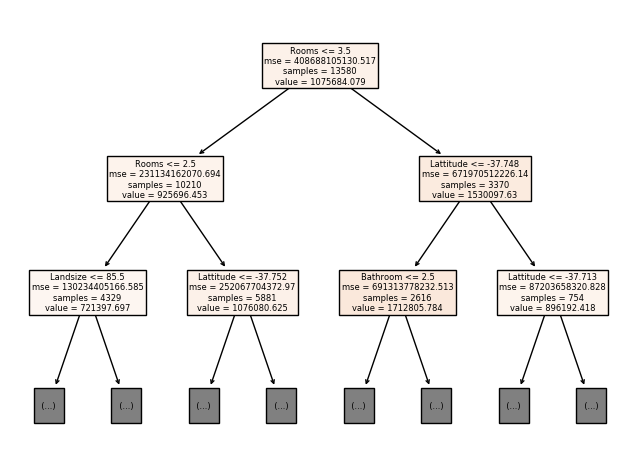

In [19]:
# view tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize=6, filled=True)
plt.show()

In [23]:
mdlDtrMlb.predict(X.head())

array([1480000., 1035000., 1465000.,  850000., 1600000.])

In [24]:
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [25]:
y_pred = mdlDtrMlb.predict(X)

In [26]:
y_pred

array([1480000., 1035000., 1465000., ..., 1170000., 2500000., 1285000.])

### 4. Evaluate

In [35]:
from sklearn.metrics import mean_absolute_error

print("MAS:",mean_absolute_error(y, y_pred))

MAS: 1125.1804614629357


In [28]:
y.mean()

1075684.079455081

## Split data into train and test to avoid overfitting

In [38]:
from sklearn.model_selection import train_test_split

# 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
# Define model
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)

# Fit
mdlDtrMlbSpl.fit(X_train,y_train)

# Predict
y_test_pred = mdlDtrMlbSpl.predict(X_test)

# Evaluate test data, actual vs. pred
print("MAS (after train-test-split):",mean_absolute_error(y_test, y_test_pred))

MAS (after train-test-split): 238406.56130338734
